# Full Literature Search
- To run a literature search of PubMed, Embase, CENTRAL, Web of Science, SCOPUS, PsycINFO

## Queries

### Pubmed Query:
("Foreign Bodies"[MeSH] OR "foreign obj*” OR "foreign bod*”)
AND
("Self-Injurious Behavior[MeSH]" OR "intent*” OR "deliberate*" OR "purpose*” OR "self-injur*” OR "selfharm*" OR "self-harm*”)
AND
(“ingest*” OR “swallow*”))
AND
(“Endoscopy”[MeSH] OR “Surgical Procedures, Operative”[MeSH] OR “Conservative Treatment”[MeSH] OR "Drug Therapy"[MeSH] OR “surg*” OR “endoscop*” OR “EGD” OR “OGD” OR “Esophagogastroduodenoscopy” OR “Oesophagogastroduodenoscopy” OR “manag*”)

### Embase Query
All Fields

('foreign body'/exp OR 'foreign obj*' OR 'foreign bod*') 
AND 
('automutilation'/exp OR 'intent*' OR 'deliberate*' OR 'purpose*' OR 'self-injur*' OR 'selfharm*' OR 'self-harm*') 
AND 
('swallowing'/exp OR 'ingest*' OR 'swallow*') 
AND 
('endoscopy'/exp OR 'surgery'/exp OR 'conservative treatment'/exp OR 'drug therapy'/exp OR 'surg*' OR 'endoscop*' OR “EGD” OR “OGD” OR “Esophagogastroduodenoscopy” OR “Oesophagogastroduodenoscopy” OR 'manag*')

### Cochrane (CENTRAL) Query
All Fields

([mh foreign bodies] OR (foreign NEXT obj*) OR (foreign NEXT bod*))
AND
([mh self-injurious behavior] OR intent* OR deliberate* OR purpose* OR (self NEXT injur*) OR (self NEXT harm*))
AND
(ingest* OR swallow*)
AND
([mh endoscopy"] OR [mh "surgical procedures, operative"] OR [mh "conservative treatment"] OR [mh "drug therapy"] OR 'surg*' OR 'endoscop*' OR “EGD” OR “Esophagogastroduodenoscopy” OR “Oesophagogastroduodenoscopy” OR 'manag*'))


### Web of Science Query
Link: https://www.webofscience.com/wos/woscc/summary/4da44d48-3e09-4a94-a3bd-ff8139e94859-01387ccd63/relevance/1

(ALL=(foreign obj* OR foreign bod*)
AND
ALL=(automutilation OR intent* OR deliberate* OR purpose* OR self-injur* OR selfharm* OR self-harm*)
AND 
ALL=(swallowing OR ingest* OR swallow*)
AND
ALL=(endoscopy OR surgery OR conservative treatment OR drug therapy OR surg* OR endoscop* OR EGD OR Esophagogastroduodenoscopy OR Oesophagogastroduodenoscopy OR manag*))

### SCOPUS Query
( ALL ( foreign PRE/0 obj* OR foreign PRE/0 bod* ) 
AND ALL ( intent* OR deliberate* OR purpose* OR self PRE/0 injur* OR self PRE/0 harm* ) 
AND ALL ( ingest* OR swallow* ) 
AND ALL ( endoscopy OR surgery OR ‘conservative’ OR ‘treatment’ OR ‘drug’ OR ‘therapy’ OR surg* OR endoscop* OR egd OR esophagogastroduodenoscopy OR oesophagogastroduodenoscopy OR manag* ) )

### PsycINFO
Link: https://search-ebscohost-com.ezproxy.library.qmul.ac.uk/login.aspx?direct=true&db=psyh&bquery=(foreign+obj*+OR+foreign+bod*)+AND+(DE+%26quot%3bNonsuicidal+Self-Injury%26quot%3b+OR+automutilation+OR+intent*+OR+deliberate*+OR+purpose*+OR+self+injur*+OR+self+harm*)+AND+(DE+%26quot%3bIngestion%26quot%3b+OR+ingest*+OR+swallow*)+AND+(DE+%26quot%3bSurgery%26quot%3b+OR+endoscop*+OR+conservative+treatment+OR+drug+therapy+surg*+OR+endoscop*+OR+egd+OR+esophagogastroduodenoscopy+OR+oesophagogastroduodenoscopy+OR+manag*)&type=0&searchMode=Standard&site=ehost-live

(foreign obj* OR foreign bod*)
AND
(DE "Nonsuicidal Self-Injury" OR automutilation OR intent* OR deliberate* OR purpose* OR self injur* OR self harm*)
AND
(DE "Ingestion" OR ingest* OR swallow*)
AND
(DE "Surgery" OR endoscop* OR conservative treatment OR drug therapy surg* OR endoscop* OR egd OR esophagogastroduodenoscopy OR oesophagogastroduodenoscopy OR manag*)

## Setup

In [905]:
# Import python libraries
import os               # for accessing local file systems
import pandas as pd     # for dataframe functionality
from matplotlib import pyplot as plt    # for plotting data
from matplotlib import rcParams         # for standardising plot layouts
from dotenv import load_dotenv, dotenv_values # for environmental variables, aiding privacy when not wanting to display private information (API keys; actual file locations)

# Import custom functions from helper.py file for use in this project.
from helpers import dataframe_to_ris, track_duplicate_removal

# Try to load environment variables from .env file
try: 
    load_dotenv()   # should return True if successful.
except ImportError:
    # if fails, print error.
    print("Environment Variables failed to load")

INPUT_PATH = os.getenv('INPUT_PATH')    # define input path for environment
OUTPUT_PATH = os.getenv('OUTPUT_PATH')  # define output path for environment

# pre-format plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica Neue']
rcParams['text.color'] = '#404040'
rcParams['axes.labelcolor'] = '#404040'
rcParams['xtick.color'] = '#404040'
rcParams['ytick.color'] = '#404040'
rcParams['axes.edgecolor'] = '#404040'  # Color of the axes edges
rcParams['grid.color'] = '#404040'      # Color of the gridlines
rcParams['axes.titlecolor'] = '#404040' # Color of the axes title (optional)
rcParams['figure.figsize'] = [10, 6]  # Width, Height in inches
rcParams['figure.dpi'] = 500

## Concatination of Database Datframes and Duplicate Removal


### Import Data from database queries
- As panadas dataframes, into data dictionary.

In [906]:
# define dictionary to store search data in
data = {}

# import dataframes
data["pubmed"] = pd.read_csv("/".join([INPUT_PATH, "pubmed.csv"]))          # PubMed
data["embase"] = pd.read_csv("/".join([INPUT_PATH, "embase.csv"]))          # Embase
data["cochrane"] = pd.read_csv("/".join([INPUT_PATH, "cochrane.csv"]))      # Cochrane
data["wos"] = pd.read_excel("/".join([INPUT_PATH, "wos.xls"]))              # WOS
data["scopus"] = pd.read_csv("/".join([INPUT_PATH, "scopus.csv"]))          # SCOPUS        
data["psycinfo"] = pd.read_csv("/".join([INPUT_PATH, "psycinfo.csv"]))      # PyscINFO

### Track Paper Count / Duplicate Removal Tracking
- Use a python dictionary to track the number of papers present i.e. to track the number of duplicate removals. 

In [907]:
# define paper count dict 
paper_count_dict = {}

### Standardise Dataframe Column Headers.
- Dataframes imported from database searches contain numerous fields, and they differ between databases.
- The columns to have in the final dataframe that will be used for title and abstract screening to standardise the data.
- In this stage, I will rename certain columns in specific database dataframes and then concatinate the dataframes into one final dataframe for title and abstract screening.

In [908]:
# define desired column headers for later extraction to final dataframe
desired_columns = [
    "Publication Year",
    "First Author",
    "Authors",
    "Publication Title",
    "Title",
    "Abstract",
    "DOI",
    "Database"
]

print(f"The columns I want in my final dataframe are: {desired_columns}")

The columns I want in my final dataframe are: ['Publication Year', 'First Author', 'Authors', 'Publication Title', 'Title', 'Abstract', 'DOI', 'Database']


### Rename column headers
- For each database dataframe.

#### Pubmed

In [909]:
# rename pubmed dataframe columns to fit desired column headers 
data["pubmed"].rename(columns={     # rename columns
    "Abstract Note": "Abstract",    # rename 'Abstract Note' as 'Abstract'
    "Key": "PMID",                  # rename 'Key' as 'PMID'
    "Author": "Authors"             # rename 'Author' as 'Authors'
}, inplace=True)                    # keep changes in place on original dataframe

# create first author column formatted as Surname, F.
data["pubmed"]["First Author"] = (
    data["pubmed"]["Authors"]
    .fillna("")                     # Replace NaN with an empty string
    .str.split(";")                 # Split multiple authors by ';'
    .str[0]                         # Take the first author
    .str.strip()                    # Remove leading/trailing spaces
    .apply(lambda name: f"{name.split()[0]} {name.split()[1][0]}." if len(name.split()) > 1 else name)
)   # format final First Author string as Surname, F.

#### Embase

In [910]:
# Rename embase dataframe columns to fit desired column headers
data["embase"].rename(columns={             # rename columns
    "Medline PMID": "PMID",                 # 'Medline PMID' as 'PMID'
    "Source title": "Publication Title",    # 'Source title' as 'Publication Title'
    "Author Names": "Authors"               # 'Author Names' as 'Authors'
}, inplace=True)    

# create first author column formatted as Surname, F.
data["embase"]["First Author"] = (
    data["embase"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]}, {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)

#### Cochrane

In [911]:
# Rename cochrane columns to fit desired column headers
data["cochrane"].rename(columns={           # Rename columns
    "Year": "Publication Year",             # 'Year' as 'Publication Year'
    "Source": "Publication Title",          # 'Source' as 'Publication Title'
    "Author(s)": "Authors"                  # 'Author(s) as 'Authors'
}, inplace=True)                            # in place on original dataframe

# create first author column formatted as Surname, F.
data["cochrane"]["First Author"] = (
    data["cochrane"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]} {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)

#### Web of Science

In [912]:
# Rename Web of Science columns to fit desired column headers
data["wos"].rename(columns={                # rename columns
    "Pubmed Id": "PMID",                    # 'Pubmed Id' as 'PMID'
    "Article Title": "Title",               # 'Article Title' as 'Title'
    "Source Title": "Publication Title"     # 'Source Title' as 'Publication Title'
}, inplace=True)                            # Save changes in place on original dataframe

# create first author column formatted as Surname, F.
data["wos"]["First Author"] = (
    data["wos"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]} {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)

#### SCOPUS

In [913]:
# rename wos columns to fit desired column headers
data["scopus"].rename(columns={
    "Year": "Publication Year",
    "PubMed ID": "PMID",
    "Source title": "Publication Title"
}, inplace=True)

# create first author column formatted as Surname, F.
data["scopus"]["First Author"] = (
    data["scopus"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]}, {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )
    .str.rstrip(",")  # Remove trailing commas if present
)

#### PsycINFO

In [914]:
# Rename PsycINFO column headers to fit desired column headers.
data['psycinfo'].rename(columns={           # rename columns
    "Abstract Note": "Abstract",            # 'Abstract Note' as 'Abstract'
    "Author": "Authors"                     # 'Author' as 'Authors'
}, inplace=True)                            # save changes in place on original dataframe.

# Create first author column formatted as Surname, F.
data["psycinfo"]["First Author"] = (      
    data["psycinfo"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]} {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)

#### Add Database column

In [915]:
# add Database column to each dataframe so I know which database each source came from.
for key, df in data.items():
    if key == "pubmed":
        df['Database'] = "PubMed"
    elif key == "embase":
        df['Database'] = "Embase"
    elif key == "cochrane":
        df['Database'] = "Cochrane"
    elif key == "wos":
        df['Database'] = "Web of Science"
    elif key == "scopus":
        df['Database'] = "SCOPUS"
    elif key == "psycinfo":
        df['Database'] = "PsycINFO"
    else:
        df['Database'] = "Unknown"

### Create Final Dataframe
- Combine desired columns from each database into one large dataframe for analysis and export for Title and Abstract Screening.

#### Extract desired columns for database dataframes.

In [916]:
extracted_data = [] # create list in which to store extracted data.
for database, df in data.items():       # iterate through each database and corresponding dataframe in data dictionary
    extracted_df = df[desired_columns]  # select predefined desired columns from selected dataframe and extract to new dataframe.
    extracted_data.append(extracted_df) # append the extracted dataframe to a the list of extracted data.

# Combine/concatinate all extracted DataFrames in extracted_data list into a single DataFrame called final_df (dataframe)
final_df = pd.concat(extracted_data, ignore_index=True)

# Ensure that no rows/papers are lost by countingfinal

# calculate the number of papers before dataframes were
preextraction_paper_count = 0               # define variable pre-extraction paper count and set to 0.
for database, df in data.items():           # iterate through each database and corresponding dataframe in data dictionary
    preextraction_paper_count += len(df)    # add the length of selected dataframe to the pre-extraction count

# Calculate number of papers after concantination of desired columns from database dataframes.
postextraction_paper_count = len(final_df)  # postextraction_paper_count = length of the final dataframe.

# Print out result
print(f"There were {preextraction_paper_count} articles in the data before desired columns were extracted to a seperate dataframe. There are now {postextraction_paper_count} in the Final Dataframe. {preextraction_paper_count - postextraction_paper_count} papers were lost during this stage of processing.")

There were 673 articles in the data before desired columns were extracted to a seperate dataframe. There are now 673 in the Final Dataframe. 0 papers were lost during this stage of processing.


#### Format and Tidy Final Dataframe

In [917]:
# Reformat some journal information to aid removal of duplicates

# fix capitalisation in Publication Title column
final_df['Publication Title'] = final_df['Publication Title'].str.title()

# sort by publication year, then first author
final_df = final_df.sort_values(by=["Publication Year", "First Author"]).reset_index(drop=True)

# titlise first author column
final_df["First Author"] = final_df["First Author"].str.title()

# strip full stops from end of journal titles
final_df["Title"] = (
    final_df["Title"]
        .str.strip(".")
        .str.replace(r"[()\[\]{}]", "", regex=True)
        .str.capitalize()
)

# remove word the from beginning of journal titles
final_df["Publication Title"] = final_df["Publication Title"].str.replace(r"^The\s+", "", regex=True)

# reformat DOI to lower case
final_df["DOI"] = final_df["DOI"].str.lower()

In [918]:
paper_count_dict = track_duplicate_removal("Start", len(final_df), 0, tracking_dict=paper_count_dict)

print(f'There are {paper_count_dict[0]["Count"]["Start"]} papers in the dataframe before duplicate removal.')

Start: Start=0, End=673, Removed=-673
-673 duplicates removed so far.
There are 0 papers in the dataframe before duplicate removal.


#### Database Counts

In [919]:
### Database counts
database_counts = pd.DataFrame({
    'Database': list(data.keys()),                  # Database label
    'Count': [len(df) for df in data.values()]      # Count is the length of each dataframe 
})

# reorder by count descending
database_counts = database_counts.sort_values(by='Count', ascending=False)

# Fix capitalisation of Database names
database_counts.loc[0, 'Database'] = 'PubMed'
database_counts.loc[1, 'Database'] = 'Embase'
database_counts.loc[2, 'Database'] = 'Cochrane'
database_counts.loc[3, 'Database'] = 'WoS'
database_counts.loc[4, 'Database'] = 'SCOPUS'
database_counts.loc[5, 'Database'] = 'PsycINFO'

# display
database_counts

,Database,Count
0,PubMed,317
3,WoS,277
1,Embase,25
4,SCOPUS,24
5,PsycINFO,16
2,Cochrane,14


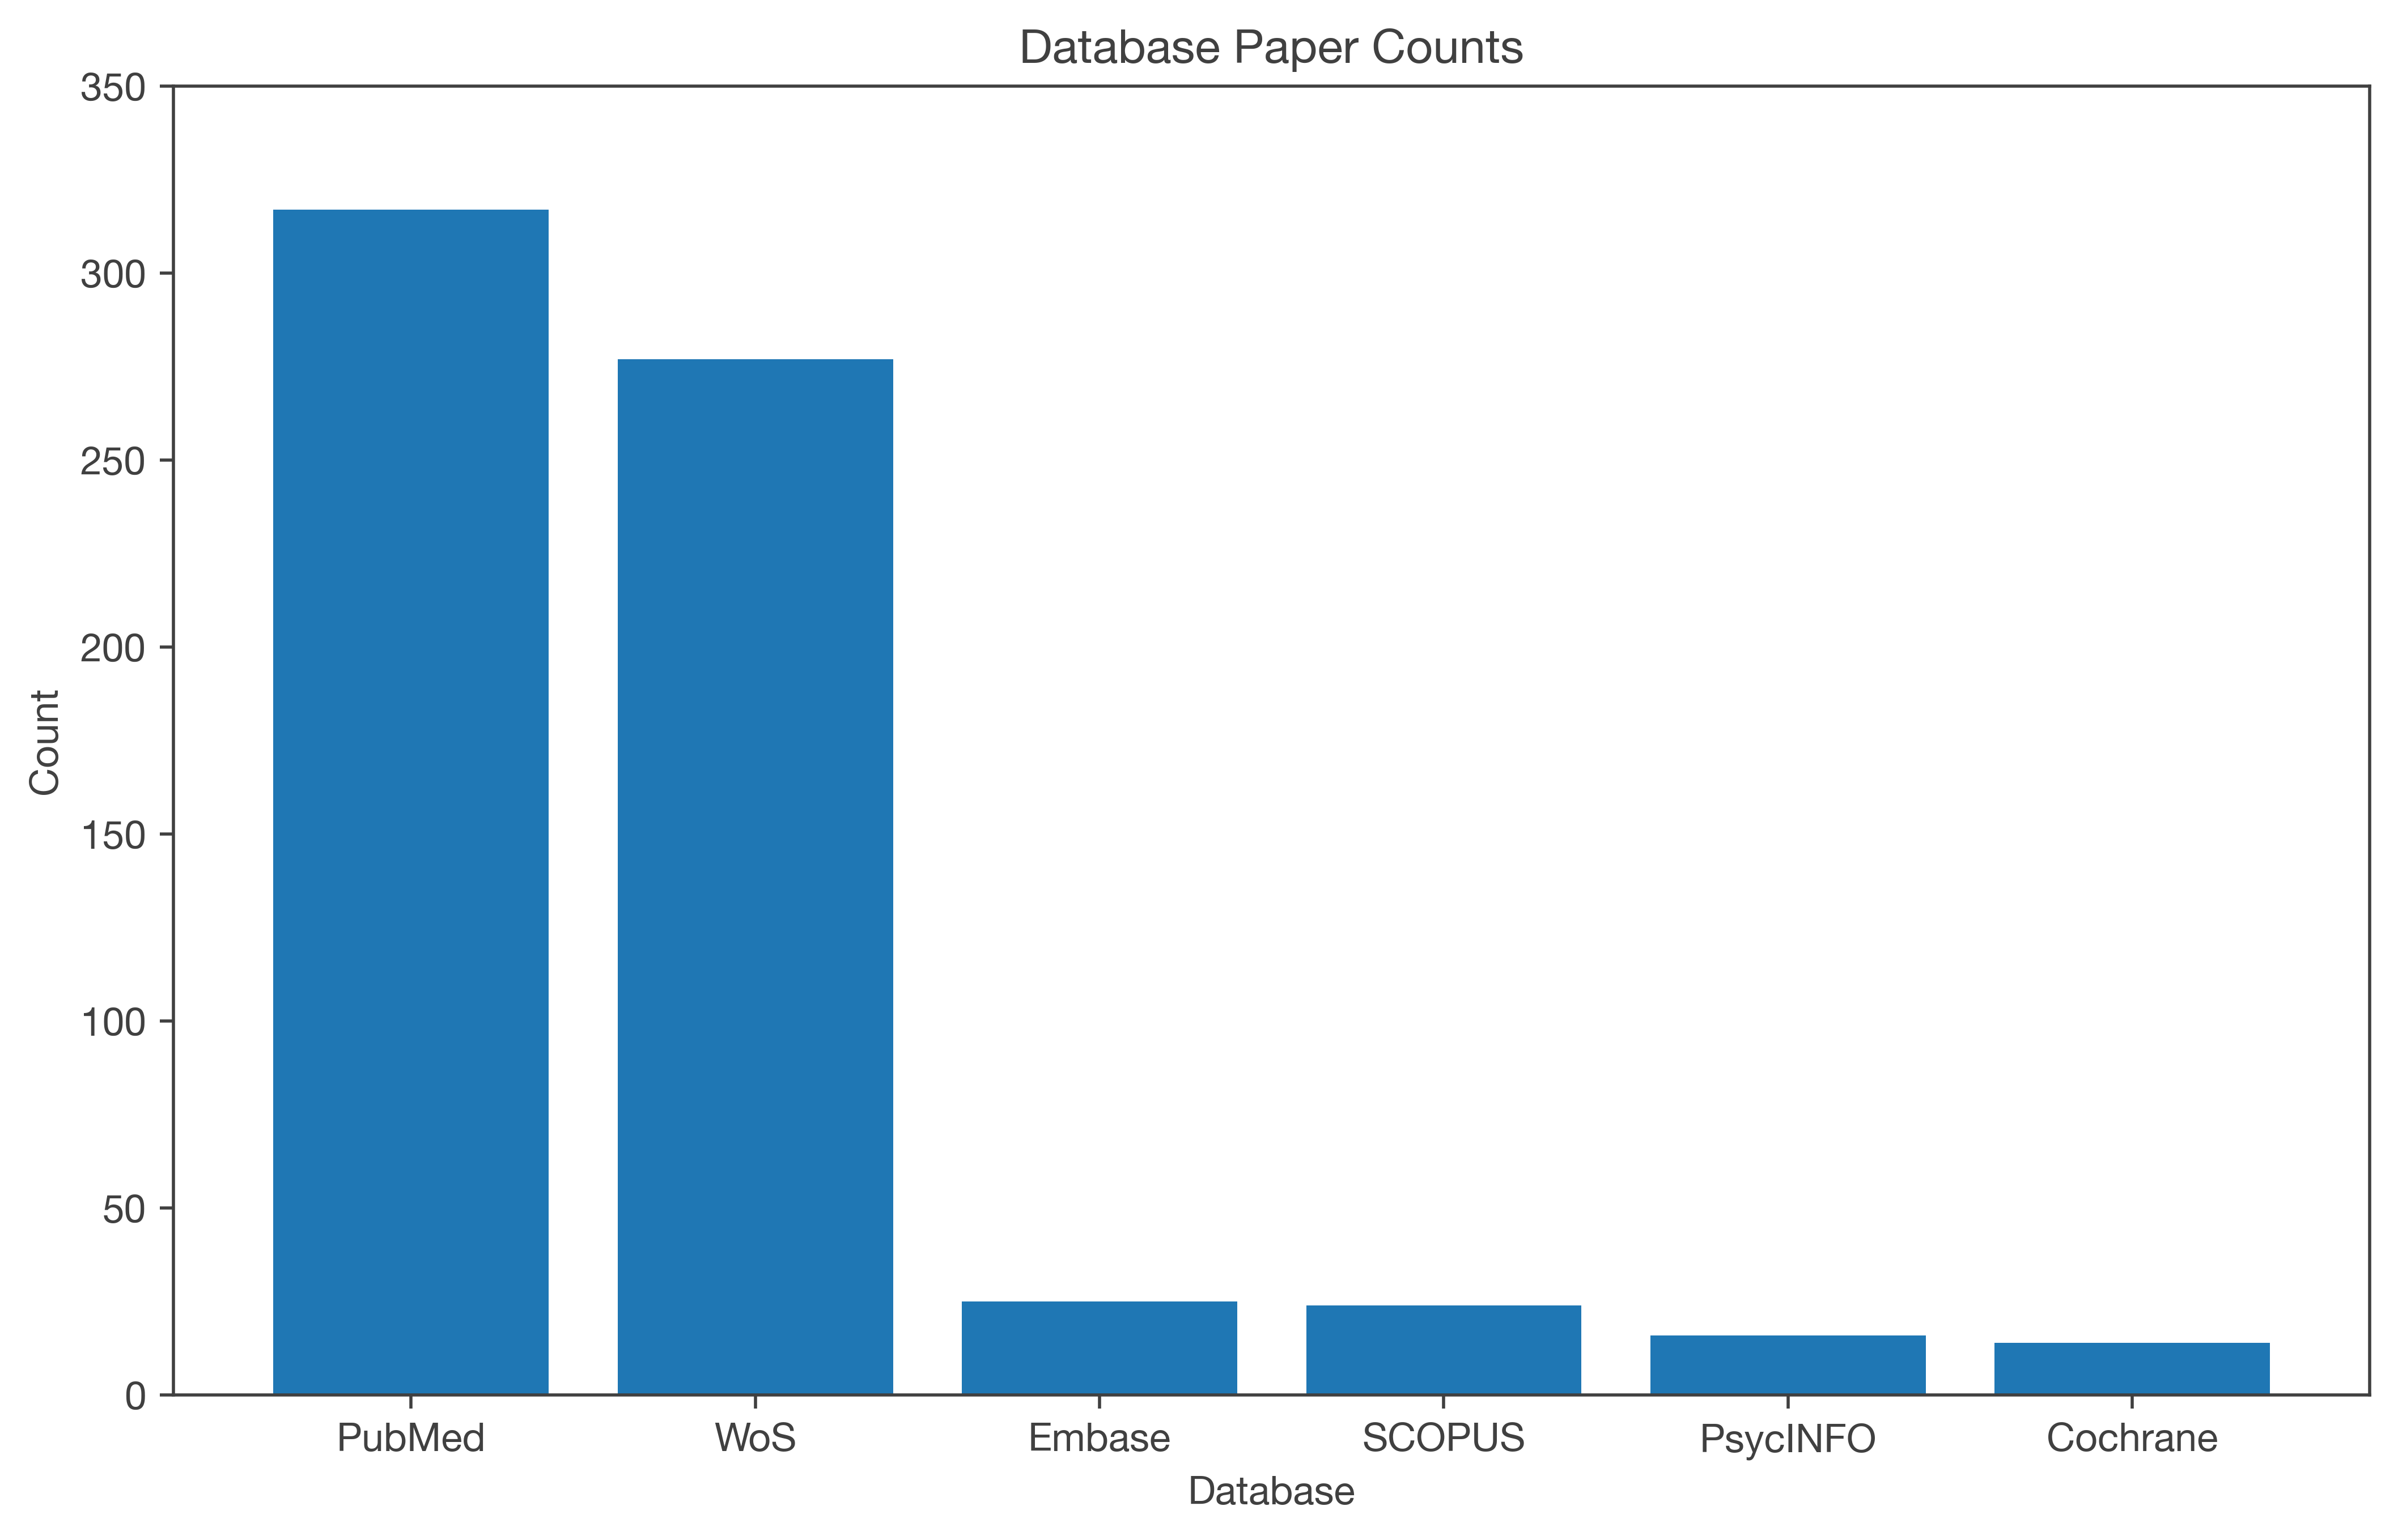

In [920]:
plt.bar(x=database_counts['Database'], 
        height=database_counts['Count'])
plt.ylim(top=350)

plt.title("Database Paper Counts")
plt.xlabel("Database")
plt.ylabel("Count")
plt.show()

#### Remove Duplicates

In [921]:
comparison_columns=["Publication Year", "First Author", "Publication Title", "Title", "DOI"] # define comparison columns to compare duplicates against.
final_df = final_df.drop_duplicates(subset=comparison_columns, keep="first") # remove entries with same comparison column 

paper_count_dict = track_duplicate_removal(f"Duplicate removal based on columns: {', '.join(comparison_columns)}", len(final_df), tracking_dict=paper_count_dict) # update paper count dictionary

final_df = final_df.drop_duplicates(subset="DOI", keep="first") # drop duplicate papers based on if they have matching DOI.
paper_count_dict = track_duplicate_removal(f"Duplicate removal based on matching DOI", len(final_df), tracking_dict=paper_count_dict) # update paper count dictionary

Duplicate removal based on columns: Publication Year, First Author, Publication Title, Title, DOI: Start=673, End=546, Removed=127
-546 duplicates removed so far.
Duplicate removal based on matching DOI: Start=546, End=360, Removed=186
-360 duplicates removed so far.


#### Export to CSV
- Add three blank columns titled "Exclude", "Reason Num" and "Reason" to final_df for export as csv. 
- "Exclude" will be boolean variable (True/False) to mark whether paper is to be excluded or not.
- "Reason ID" will be a numeric categorical variable will correspond to a table of exclusion criteria allowing for tracking an analysis of exclusion reasons, aiding PRISMA diagram.
- "Reason" will contain a brief description or note of why the paper was included, likely the same as the text version of the Reason ID.

Exclusion Criteria:
1.	Full text not available in English.
2.	Studies not focusing on intentional ingestion of foreign object via the oral cavity (mouth).
3.	Studies focussing solely on accidental ingestion.
4.	Non-Human/Animal studies.
5.	Reviews, editorials, commentaries, and opinion pieces without original empirical data.
6.	Duplicate publications or studies with overlapping data sets (the most comprehensive or recent study will be included).
7.	Studies focusing on ingestion of substances (e.g. poisons, medications) rather than physical foreign objects.
8.	Ingestions undertaken in controlled environment as part of voluntary study.

In [922]:
# Add three blank columns titled "Exclude", "Reason Num" and "Reason" to final_df for export as csv
final_df["Exclude"] = None      # Add blank "Exclude" column
final_df["Reason ID"] = None    # Add blank "Reason ID" column
final_df["Reason"] = None       # Add blank "Reason" column

# Export to csv
final_df.to_csv("/".join([OUTPUT_PATH, "title_abstract_review_start.csv"]), index=False)

## Title and Abstract Screening

### ASReview
This step was omitted as ASReview seemingly adds no benefit here.
Majority of papers were deemed relevant and need to full-text review.
All ASReview adds to this situation is using an AI model to suggest more relevant papers sooner and provides a nice user interface for use in the title and abstract screening process.
Labelling articles as 'ASReview Relevant' or 'ASReview irrelevant' in ASReview attaches a note to the .ris file, which can then be read and interpreted in a reference manager. Whilst I intend to use a reference manager (Zotero), I would rather organise and label title and abstracts in Microsoft Excel, then later import the relevant papers (papers not excluded) to Zotero for full text screening. Using excel in this way also allows for categorising of exclusions which will benefit a PRISMA diagram.
Can revisit this decision if things change.

### Manual Review in MS Excel

In [923]:
# Define exclusion criteria:
exclusion_criteria = {
    1: "Full text not available in English.",
    2: "Studies not focusing on intentional ingestion of foreign object via the oral cavity (mouth).",
    3: "Studies focussing solely on accidental ingestion.",
    4: "Non-Human/Animal studies.",
    5: "Reviews, editorials, commentaries, and opinion pieces without original empirical data.",
    6: "Duplicate publications or studies with overlapping data sets (the most comprehensive or recent study will be included).",
    7: "Studies focusing on ingestion of substances (e.g. poisons, medications) rather than physical foreign objects.",
    8: "Ingestions undertaken in controlled environment as part of voluntary study."
}

In [924]:
# import data from title and abstract screening
title_abstract_screened_df = pd.read_csv("/".join([INPUT_PATH, "inclusion_table.csv"]))

# create dataframe of excluded papers
title_abstract_exclude = title_abstract_screened_df[title_abstract_screened_df["Exclude"] == True]
print(f"{len(title_abstract_exclude)} papers were excluded during title and abstract screening.")

# view dataframe head (top 5 rows)
title_abstract_exclude.head()


79 papers were excluded during title and abstract screening.


,Publication Year,First Author,Authors,Publication Title,Title,Abstract,DOI,Database,Exclude,Reason ID,Reason,Unnamed: 11,Unnamed: 12
0,1975,"Davidoff, E.","Davidoff, Elliott; Towne, Jonathan B.",New York State Journal Of Medicine,Ingested foreign bodies,Discusses 7 case histories of White male feder...,NaN,PsycINFO,True,1.0,Full text not available,Include,247.0
1,1989,"Friedman, E.","Friedman, E. M.",Pediatric Clinics Of North America,Caustic ingestions and foreign bodies in the a...,"Caustic ingestions, both accidental and intent...",10.1016/s0031-3955(16)36796-7,PubMed,True,7.0,Ingestion of substance,Exclude,79.0
2,1991,"Brusis, T.","Brusis, T.; Luckhaupt, H.",Laryngo- Rhino- Otologie,History of esophagoscopy,Since the middle of the 19th century very many...,10.1055/s-2007-997999,PubMed,True,5.0,Commentary,NaN,NaN
3,1994,"Scharman, E.","Scharman, E. J.; Lembersky, R.; Krenzelok, E. P.",American Journal Of Emergency Medicine,Efficiency of whole bowel irrigation with and ...,Whole bowel irrigation (WBI) with a polyethyle...,10.1016/0735-6757(94)90144-9,PubMed,True,8.0,Controlled environment,NaN,NaN
4,1996,"Leder, S.","Leder, S. B.",Head & Neck,Gag reflex and dysphagia,BACKGROUND: The gag reflex is a protective res...,10.1002/(sici)1097-0347(199603/04)18:2<138::ai...,PubMed,True,2.0,No intentional ingestion of foreign object,NaN,NaN


In [925]:
# create table of exclusion reasons by counting the occurance of each reason ID in the title abstract_exclude dataframe.
title_abstract_exclusion_reasons = title_abstract_exclude['Reason ID'].value_counts().reset_index(name="Count")

# set Reason ID as type integer to remove decimal.
title_abstract_exclusion_reasons["Reason ID"] = title_abstract_exclusion_reasons["Reason ID"].astype(int)

# map exclusion criteria to exclusion ID.
title_abstract_exclusion_reasons["Exclusion Reason"] = title_abstract_exclusion_reasons['Reason ID'].map(exclusion_criteria)

print("The reasons for exclusion during title and abstract screening are as follows:")
# show title abstract exclusion reasons
title_abstract_exclusion_reasons


The reasons for exclusion during title and abstract screening are as follows:


,Reason ID,Count,Exclusion Reason
0,2,44,Studies not focusing on intentional ingestion ...
1,7,11,Studies focusing on ingestion of substances (e...
2,4,9,Non-Human/Animal studies.
3,3,8,Studies focussing solely on accidental ingestion.
4,5,4,"Reviews, editorials, commentaries, and opinion..."
5,1,1,Full text not available in English.
6,8,1,Ingestions undertaken in controlled environmen...


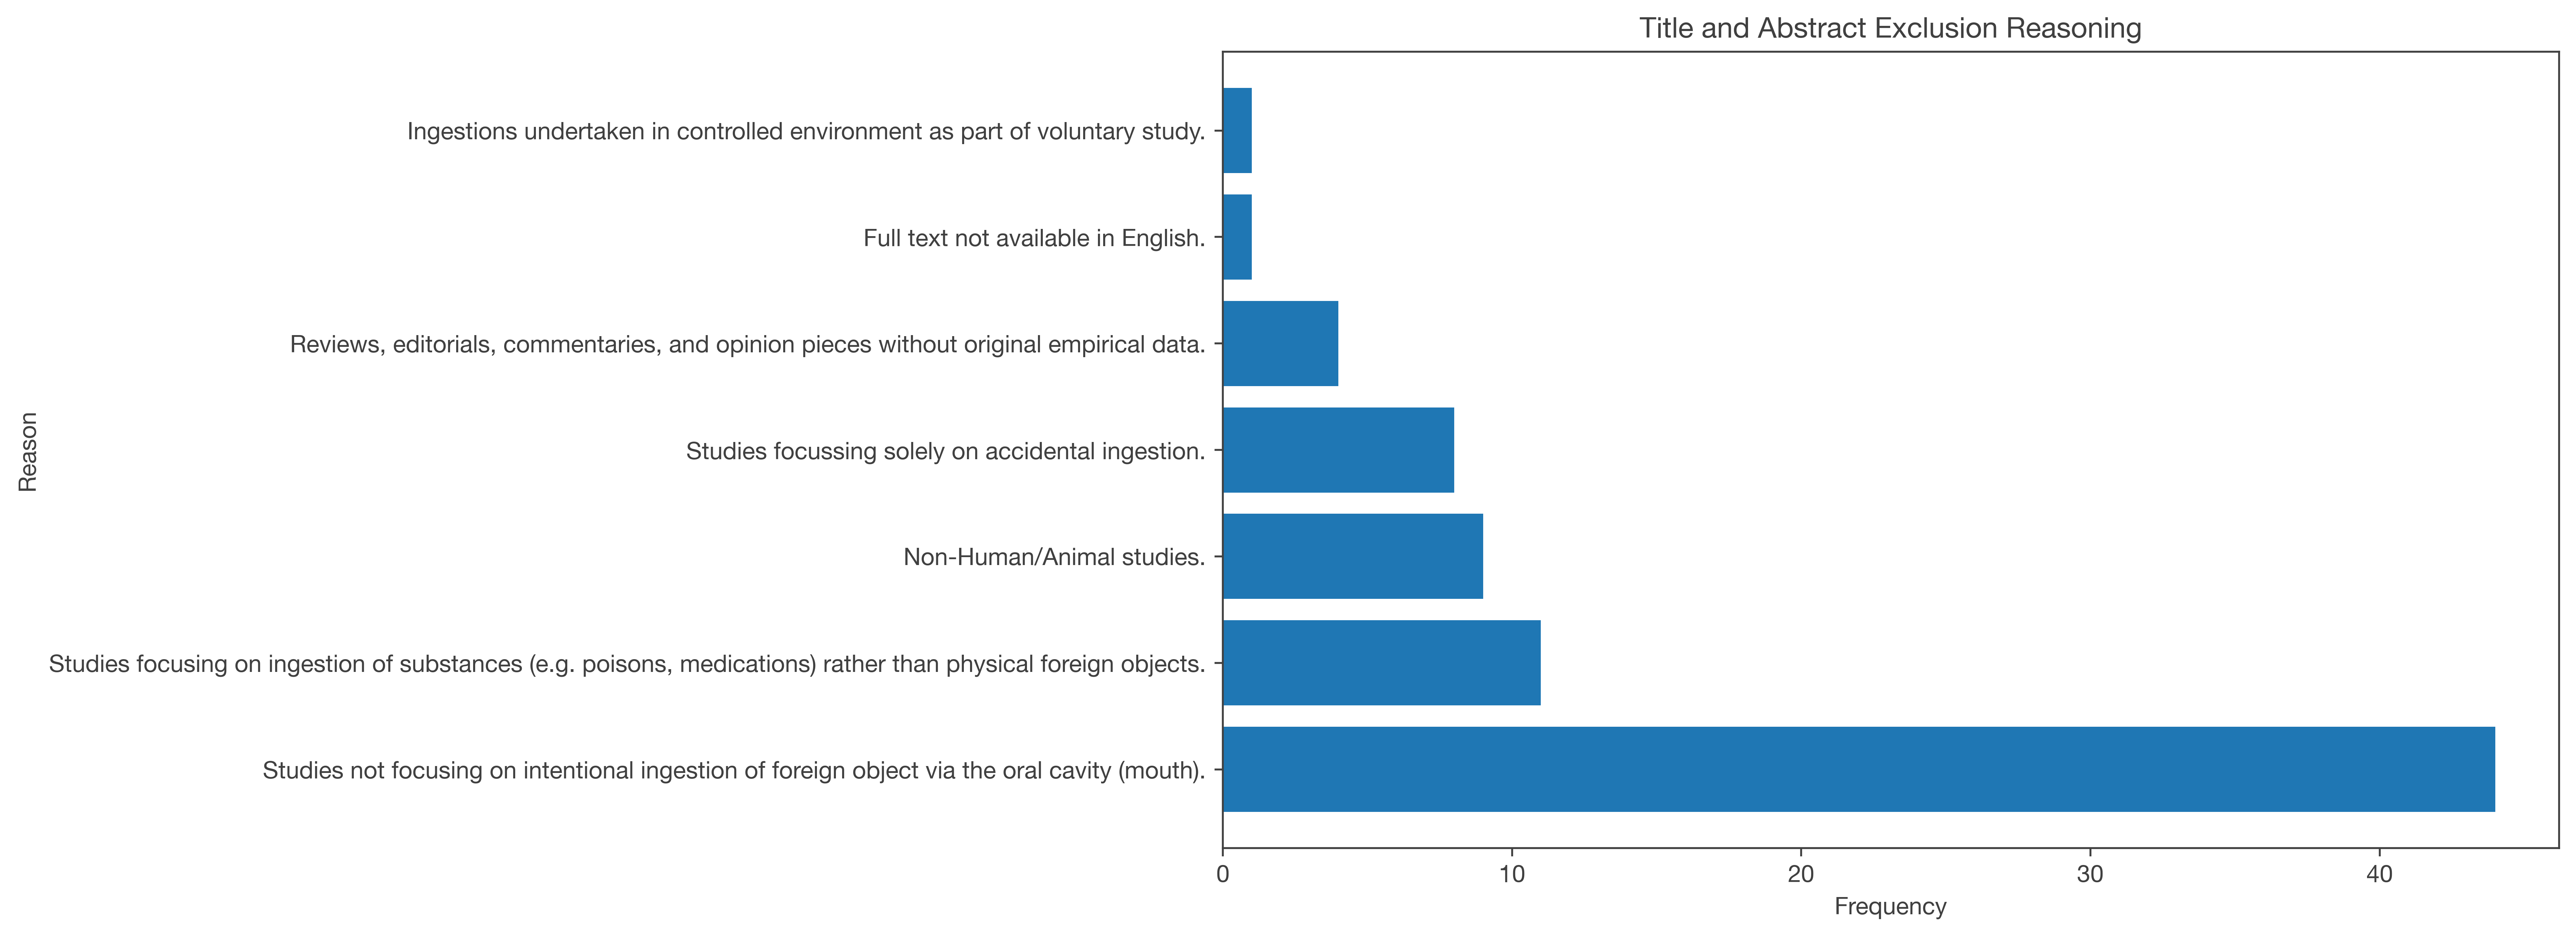

In [926]:
# plot as horizontal bar chart
plt.barh(y=title_abstract_exclusion_reasons["Exclusion Reason"],
        width=title_abstract_exclusion_reasons['Count'])

plt.title("Title and Abstract Exclusion Reasoning") # plot title
plt.ylabel("Reason")    # plot y label
plt.xlabel("Frequency")    # plot x label
plt.show() # show plot 

# TODO:

## Zotero

### Export as .ris to Zotero

In [927]:
# Define the output RIS file path
# output_ris_file = "/Users/jackgedge/Library/Mobile Documents/com~apple~CloudDocs/Dev/data/msc/dissertation/iifo_data/lit_search_4/op/output.ris"

# Convert DataFrame to RIS
# dataframe_to_ris(final_df, output_ris_file)

# print(f"RIS file saved to {output_ris_file}")

## Bias

- Expanding foam and other expanding chemicals were excluded
    - Hardened plaster also excluded.